# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [25]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [26]:
tab['probabilidade'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,probabilidade
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [27]:
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,probabilidade,chance
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [28]:
tab['RC_vs_All'] = tab['chance']/tab.loc['All', 'chance']
tab

flag_doente,0,1,All,probabilidade,chance,RC_vs_All
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [29]:
tab['Logito'] = np.log(tab.chance)
tab

flag_doente,0,1,All,probabilidade,chance,RC_vs_All,Logito
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [31]:
tab['WOE'] = np.log(tab['RC_vs_All'])
tab

flag_doente,0,1,All,probabilidade,chance,RC_vs_All,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [133]:
df['age_cat'] = pd.qcut(x=df.age, q=5, labels=['29 ~ 45', '45 ~ 53', '53 ~ 58', '58 ~ 62', '62 ~ 77'])

In [134]:
tab_age = pd.crosstab(df.age_cat, df.flag_doente, margins=True)
tab_age

flag_doente,0,1,All
age_cat,,,
29 ~ 45,47,16,63
45 ~ 53,42,22,64
53 ~ 58,32,39,71
58 ~ 62,13,32,45
62 ~ 77,30,30,60
All,164,139,303


In [135]:
tab_age['probabilidade'] = tab_age[1]/tab_age['All']
tab_age

flag_doente,0,1,All,probabilidade
age_cat,,,,
29 ~ 45,47,16,63,0.253968
45 ~ 53,42,22,64,0.343750
53 ~ 58,32,39,71,0.549296
58 ~ 62,13,32,45,0.711111
62 ~ 77,30,30,60,0.500000
All,164,139,303,0.458746


In [136]:
tab_age['chance'] = tab_age[1]/tab_age[0]
tab_age

flag_doente,0,1,All,probabilidade,chance
age_cat,,,,,
29 ~ 45,47,16,63,0.253968,0.340426
45 ~ 53,42,22,64,0.343750,0.523810
53 ~ 58,32,39,71,0.549296,1.218750
58 ~ 62,13,32,45,0.711111,2.461538
62 ~ 77,30,30,60,0.500000,1.000000
All,164,139,303,0.458746,0.847561


In [137]:
tab_age['RC_vs_All'] = tab_age['chance']/tab_age.loc['All', 'chance']
tab_age

flag_doente,0,1,All,probabilidade,chance,RC_vs_All
age_cat,,,,,,
29 ~ 45,47,16,63,0.253968,0.340426,0.401653
45 ~ 53,42,22,64,0.343750,0.523810,0.618020
53 ~ 58,32,39,71,0.549296,1.218750,1.437950
58 ~ 62,13,32,45,0.711111,2.461538,2.904261
62 ~ 77,30,30,60,0.500000,1.000000,1.179856
All,164,139,303,0.458746,0.847561,1.000000


In [138]:
tab_age['Logito'] = np.log(tab_age.chance)
tab_age

flag_doente,0,1,All,probabilidade,chance,RC_vs_All,Logito
age_cat,,,,,,,
29 ~ 45,47,16,63,0.253968,0.340426,0.401653,-1.077559
45 ~ 53,42,22,64,0.343750,0.523810,0.618020,-0.646627
53 ~ 58,32,39,71,0.549296,1.218750,1.437950,0.197826
58 ~ 62,13,32,45,0.711111,2.461538,2.904261,0.900787
62 ~ 77,30,30,60,0.500000,1.000000,1.179856,0.000000
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [139]:
tab_age['WOE'] = np.log(tab_age['RC_vs_All'])
tab_age

flag_doente,0,1,All,probabilidade,chance,RC_vs_All,Logito,WOE
age_cat,,,,,,,,
29 ~ 45,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
45 ~ 53,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
53 ~ 58,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
58 ~ 62,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
62 ~ 77,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [185]:
tab_age['media_idade'] = df.groupby('age_cat', observed=True)['age'].mean().astype(int)
tab_age.loc['All', 'media_idade'] = df.age.mean().astype(int)

In [186]:
tab_age

flag_doente,0,1,All,probabilidade,chance,RC_vs_All,Logito,WOE,media_idade
age_cat,,,,,,,,,
29 ~ 45,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.0
45 ~ 53,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.0
53 ~ 58,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.0
58 ~ 62,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.0
62 ~ 77,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.0
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

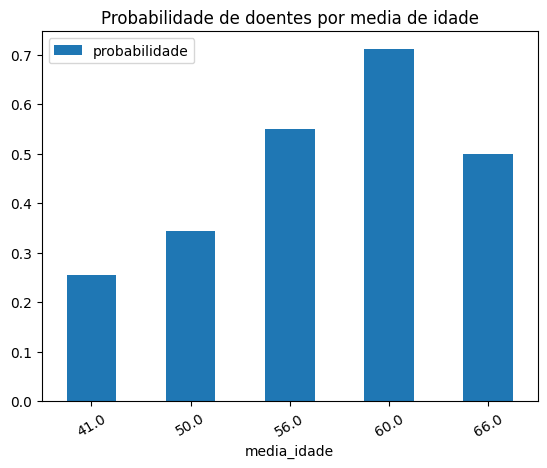

In [189]:
tab_age.drop('All').reset_index().plot(x='media_idade', y='probabilidade', kind='bar')
plt.xticks(rotation=30)
plt.title('Probabilidade de doentes por media de idade')
plt.show()